In [2]:
using Plots
using RecipesBase
using DelimitedFiles

In [30]:
include("generalfunctions_Chem_Kin.jl")

Dimerization (generic function with 5 methods)

In [31]:
# Parámetros
χ₁₀ = 1.0  # Condiciones iniciales para las concentraciones
t₀ = 0.0  # Tiempo inicial
α₁ = 0.9  # Constante de velocidad de la reacción hacia adelante
α₂ = 0.1  # Constante de velocidad de la reacción hacia atrás
λ = α₁ + α₂  # Suma de las constantes de velocidad
nₜ = 1.0 #Concentración total de las especies.

# Resolvemos las ecuaciones diferenciales
χ₁,χ₁, t = Dimerization(t₀, χ₁₀ , α₁, α₂)

# Extraemos las soluciones para χ₁ y χ₂
#χ₁, χ₂ = χ

(Real[1.0, 0.9823270570477306, 0.9652852891968464, 0.9488420664314884, 0.9329669690334269, 0.9176316035346312, 0.9028094367589913, 0.8884756459124094, 0.8746069829394336, 0.8611816515871702  …  0.20955565959215527, 0.20955565959215527, 0.20955565959215527, 0.20955565959215527, 0.20955565959215527, 0.20955565959215527, 0.20955565959215527, 0.20955565959215527, 0.20955565959215527, 0.20955565959215527], Real[0.0, 0.017672942952269434, 0.034714710803153664, 0.05115793356851171, 0.06703303096657313, 0.0823683964653688, 0.0971905632410088, 0.11152435408759076, 0.12539301706056646, 0.13881834841282983  …  0.79044434040784, 0.79044434040784, 0.79044434040784, 0.79044434040784, 0.79044434040784, 0.79044434040784, 0.79044434040784, 0.79044434040784, 0.79044434040784, 0.79044434040784], 0.0:0.01:100.0)

In [23]:
print(χ₂)

In [8]:
# Calculamos las soluciones estacionarias
Γ = α₂/(2*α₁*nₜ)
χ₁ˢˢ_val_1 = (-Γ + sqrt(Γ^2 + 4*Γ))/2
χ₂ˢˢ_val_1 = ((2 + Γ) + sqrt(Γ^2 + 4*Γ))/2
χ₁ˢˢ = fill(χ₁ˢˢ_val_1, length(t))
χ₂ˢˢ = fill(χ₂ˢˢ_val_1, length(t))

# Graficamos las soluciones
plot(title = "Dimerización k₁=$α₁, k₂=$α₂", xlabel = "t-Tiempo", ylabel = "n(t) - Concentración [1/V]", legend = :topright)
plot!(t, χ₁, label = "χ₁", color="darkgreen", linewidth=3)
plot!(t, χ₂, label = "χ₂", xlims = (0,6), color="violet", linewidth=3)
plot!(t, χ₁ˢˢ, linewidth=2, label="n₁ - estacionaria ", color="green", line=:dash)
plot!(t, χ₂ˢˢ, linewidth=2, label="n₂ - estacionaria ", color="violetred", line=:dash)
savefig("Dimerizacion2.png")


ErrorException: Cannot convert Float64 to series data for plotting

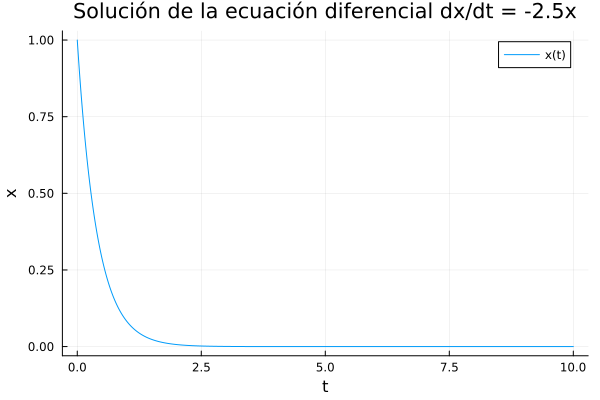

In [5]:
f = (t, x) -> -2.5 * x

x₀ = 1.0  # Condición inicial
t₀ = 0.0  # Tiempo inicial
h = 0.01  # Tamaño del paso
N = 1000  # Número de pasos

x, t = sol_diff_eq_ord(f, x₀, t₀, h, N, method="RK4")

using Plots

plot(t, x, label="x(t)", xlabel="t", ylabel="x", title="Solución de la ecuación diferencial dx/dt = -2.5x")
